# FinanceDataReader

- 한국주식가격, 미국주식가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

In [1]:
# !pip install finance-datareader

In [2]:
import pandas as pd

In [3]:
import FinanceDataReader as fdr

In [4]:
import numpy as np
import seaborn as sns
sns.set(font_scale=1)
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.simplefilter("ignore")

In [5]:
# fdr.StockListing?

In [6]:
df_krx = fdr.StockListing("KRX")

In [7]:
df_krx.shape

(7509, 10)

In [8]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7509 entries, 0 to 7508
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7509 non-null   object        
 1   Market          7509 non-null   object        
 2   Name            7509 non-null   object        
 3   Sector          2510 non-null   object        
 4   Industry        2494 non-null   object        
 5   ListingDate     2510 non-null   datetime64[ns]
 6   SettleMonth     2510 non-null   object        
 7   Representative  2510 non-null   object        
 8   HomePage        2353 non-null   object        
 9   Region          2509 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 645.3+ KB


In [9]:
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [10]:
df_krx.to_csv('krx.csv', index=False)

## 데이터 불러오기

In [11]:
df = pd.read_csv('krx.csv')
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


#### 중복을 제외한 값의 개수 확인

In [12]:
df.nunique()

Symbol            7509
Market               3
Name              7509
Sector             161
Industry          2334
ListingDate       1867
SettleMonth          8
Representative    2389
HomePage          2332
Region              22
dtype: int64

In [13]:
df.values

array([['060310', 'KOSDAQ', '3S', ..., '김세완', 'http://www.3sref.com',
        '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현, 손삼달',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['419890', 'KOSPI', '히어로즈 단기채권ESG액티브', ..., nan, nan, nan],
       ['429870', 'KOSPI', '히어로즈 리츠이지스액티브', ..., nan, nan, nan],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

In [14]:
# 특정 컬럼 조회
df['Name']

0                    3S
1                AJ네트웍스
2                 AK홀딩스
3                APS홀딩스
4                 AP시스템
             ...       
7504    히어로즈 TDF2040액티브
7505    히어로즈 TDF2050액티브
7506    히어로즈 단기채권ESG액티브
7507      히어로즈 리츠이지스액티브
7508                 힘스
Name: Name, Length: 7509, dtype: object

In [15]:
df.iloc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative                     김세완
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [16]:
# 특정 컬럼 조회 Name, Industry
df.loc[:, ['Name', 'Industry']]

,Name,Industry
0,3S,반도체 웨이퍼 캐리어
1,AJ네트웍스,"렌탈(파렛트, OA장비, 건설장비)"
2,AK홀딩스,지주사업
3,APS홀딩스,인터넷 트래픽 솔루션
4,AP시스템,디스플레이 제조 장비
...,...,...
7504,히어로즈 TDF2040액티브,NaN
7505,히어로즈 TDF2050액티브,NaN
7506,히어로즈 단기채권ESG액티브,NaN
7507,히어로즈 리츠이지스액티브,NaN


In [17]:
# 특정 열 조회 ( 0, 2, 5 )
df.loc[[0,2,5]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시


In [18]:
# 1 번 행의 Name 값만 출력
df.loc[1, 'Name']

'AJ네트웍스'

In [19]:
# 0, 3, 5 행과 Symbol 컬럼 출력
df.loc[[0,3,5], 'Symbol']

0    060310
3    054620
5    211270
Name: Symbol, dtype: object

In [20]:
# 0, 3, 5 행과 Symbol 컬럼 출력
df.loc[[0,3,5], ['Symbol', 'Name']]

,Symbol,Name
0,060310,3S
3,054620,APS홀딩스
5,211270,AP위성


In [21]:
df[df['Name'] == '카카오']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5560,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"남궁훈, 홍은택 각자 대표이사",http://www.kakaocorp.com,제주특별자치도


In [22]:
df[df['Region'] == '서울특별시']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
59,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7490,005010,KOSPI,휴스틸,1차 철강 제조업,"강관(배관용,구조용,유정용) 제조,도매",1973-06-29,12월,박훈,http://www.husteel.com,서울특별시
7497,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7498,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,임규준,http://www.insurance.co.kr,서울특별시
7501,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시


In [23]:
df.query('Market == "KOSPI"')

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7503,435530,KOSPI,히어로즈 TDF2030액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7504,435540,KOSPI,히어로즈 TDF2040액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7505,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7506,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.query("Market == 'KOSPI' & Region == '서울특별시'")

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
59,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
60,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
63,001460,KOSPI,BYC,봉제의복 제조업,"메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급",1975-06-02,12월,김 대 환,http://home.byc.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7476,081660,KOSPI,휠라홀딩스,생활용품 도매업,"스포츠의류,신발,가방,시계,골프장비,화장품,가죽제품(지갑,키홀더) 도매,수출입",2010-09-28,12월,윤근창,http://www.filaholdings.com/kr/main/index.asp,서울특별시
7487,079980,KOSPI,휴비스,화학섬유 제조업,"합성섬유(폴리에스테르원사,원면),재생섬유,폴리에스텔 원사,원면,고상칩 제조,도소매",2012-02-23,12월,신유동,http://www.huvis.com,서울특별시
7490,005010,KOSPI,휴스틸,1차 철강 제조업,"강관(배관용,구조용,유정용) 제조,도매",1973-06-29,12월,박훈,http://www.husteel.com,서울특별시
7498,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,임규준,http://www.insurance.co.kr,서울특별시


In [25]:
df.query("Market == 'KOSPI' & Region == '서울특별시'")[['Market', 'Name']]

,Market,Name
1,KOSPI,AJ네트웍스
2,KOSPI,AK홀딩스
59,KOSPI,BGF
60,KOSPI,BGF리테일
63,KOSPI,BYC
...,...,...
7476,KOSPI,휠라홀딩스
7487,KOSPI,휴비스
7490,KOSPI,휴스틸
7498,KOSPI,흥국화재


In [26]:
df.loc[(df['Market'] == 'KOSPI')&(df['Region'] == '서울특별시'), ['Symbol', 'Name']]

,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
59,027410,BGF
60,282330,BGF리테일
63,001460,BYC
...,...,...
7476,081660,휠라홀딩스
7487,079980,휴비스
7490,005010,휴스틸
7498,000540,흥국화재


#### ListingDate 데이터타입 변경 ( Datetime )

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7509 entries, 0 to 7508
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          7509 non-null   object
 1   Market          7509 non-null   object
 2   Name            7509 non-null   object
 3   Sector          2510 non-null   object
 4   Industry        2494 non-null   object
 5   ListingDate     2510 non-null   object
 6   SettleMonth     2510 non-null   object
 7   Representative  2510 non-null   object
 8   HomePage        2353 non-null   object
 9   Region          2509 non-null   object
dtypes: object(10)
memory usage: 586.8+ KB


In [28]:
df['ListingDate'] = pd.to_datetime(df['ListingDate'])

In [29]:
df['ListingYear'] = df['ListingDate'].dt.year

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7509 entries, 0 to 7508
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7509 non-null   object        
 1   Market          7509 non-null   object        
 2   Name            7509 non-null   object        
 3   Sector          2510 non-null   object        
 4   Industry        2494 non-null   object        
 5   ListingDate     2510 non-null   datetime64[ns]
 6   SettleMonth     2510 non-null   object        
 7   Representative  2510 non-null   object        
 8   HomePage        2353 non-null   object        
 9   Region          2509 non-null   object        
 10  ListingYear     2510 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 645.4+ KB


In [31]:
df[['ListingDate', 'ListingYear']]

,ListingDate,ListingYear
0,2002-04-23,2002.0
1,2015-08-21,2015.0
2,1999-08-11,1999.0
3,2001-12-04,2001.0
4,2017-04-07,2017.0
...,...,...
7504,NaT,NaN
7505,NaT,NaN
7506,NaT,NaN
7507,NaT,NaN


## Market

- KOSPI : 종합주가지수 ( 1964.1.4 기준 시점으로 다우존스식 주가 평균을 지수화한 수정주가 발표 )
- KOSDAQ : 미국의 나스닥을 한국식으로 합성한 용어 ( 1996.7.1 설립, 주로 중소벤처기업들이 포진 ) 
- KONEX : 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 기업과 벤처 기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장

In [32]:
df['Market'].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [33]:
# 빈도수
df['Market'].value_counts()

KOSPI     5802
KOSDAQ    1584
KONEX      123
Name: Market, dtype: int64

<AxesSubplot:>

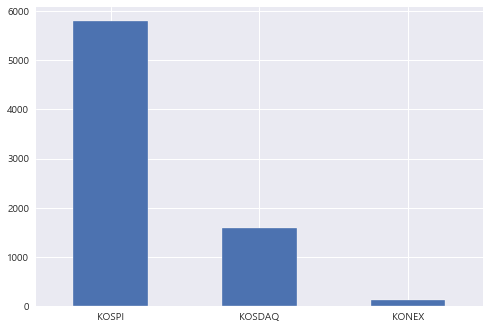

In [34]:
df['Market'].value_counts().plot.bar(rot=0)

<AxesSubplot:>

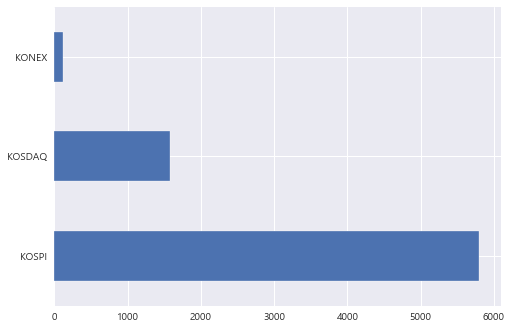

In [35]:
df['Market'].value_counts().plot.barh(rot=0)

#### Seaborn countplot() bar chart

- value_counts() 함수 없이 자동처리

<AxesSubplot:xlabel='Market', ylabel='count'>

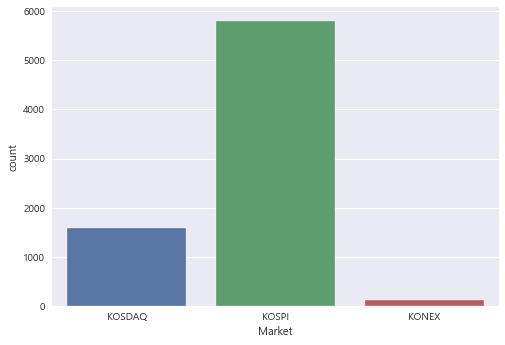

In [36]:
sns.countplot(data=df, x='Market')

<AxesSubplot:xlabel='count', ylabel='Market'>

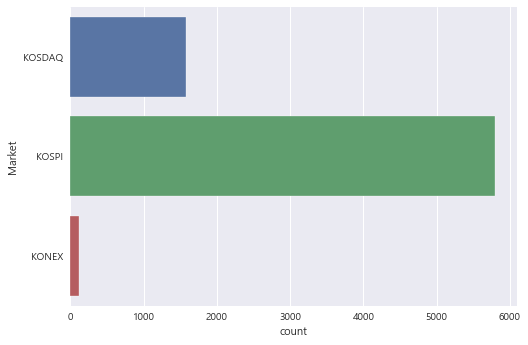

In [37]:
sns.countplot(data=df, y='Market')

## Sector

In [38]:
df['Sector'].value_counts()

소프트웨어 개발 및 공급업       152
특수 목적용 기계 제조업        151
전자부품 제조업             127
의약품 제조업               96
자동차 신품 부품 제조업         95
                    ... 
기타 비금속광물 광업            1
의복 액세서리 제조업            1
악기 제조업                 1
인형,장난감 및 오락용품 제조업      1
해체, 선별 및 원료 재생업        1
Name: Sector, Length: 161, dtype: int64

<AxesSubplot:xlabel='Sector', ylabel='count'>

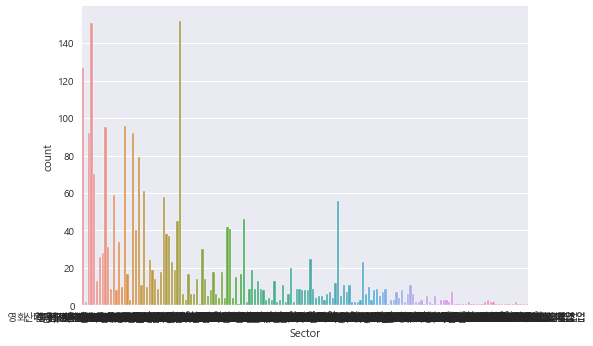

In [39]:
sns.countplot(data=df, x='Sector')

In [40]:
sector30 = df['Sector'].value_counts().head(30)

df_sector30 = df[df['Sector'].isin(sector30.index)]
df_sector30.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시,2002.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시,2016.0


<AxesSubplot:xlabel='count', ylabel='Sector'>

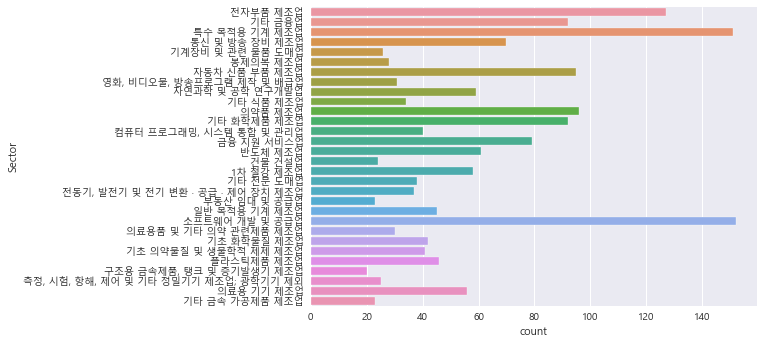

In [42]:
# Sector 빈도수 높은 순으로 30개 추출 후 countplot
sns.countplot(data=df_sector30, y='Sector')

Text(0.5, 1.0, '섹터별 빈도 수')

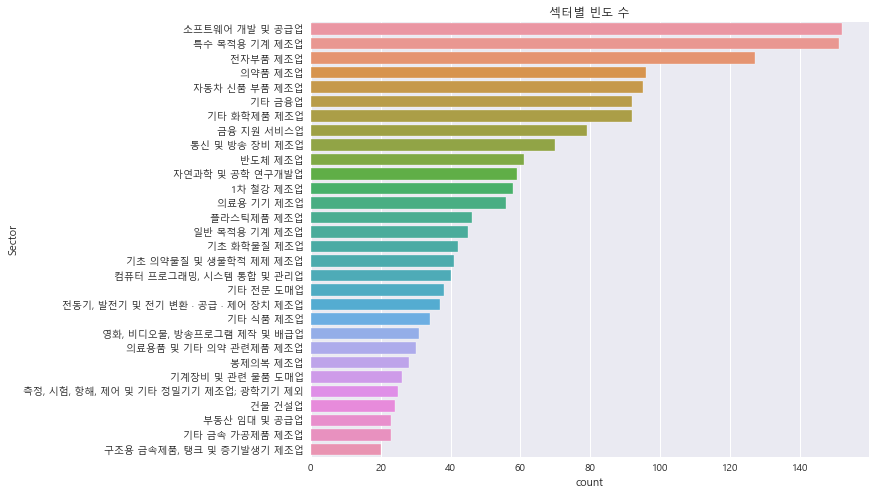

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_sector30, y='Sector', order=sector30.index)
plt.title('섹터별 빈도 수')

## Industry

In [46]:
df['Industry'].value_counts()

기업인수합병                               30
지주회사                                 20
지주사업                                  9
기업인수 및 합병                             8
화장품                                   7
                                     ..
자회사관리, 부동산임대                          1
철강                                    1
유가증권 매매,위탁매매,인수,주선                    1
의약품,치약,의약부외품(부광탁스,레가론,부광안티프라그) 제조     1
OLED Mask 인장기, OLED Mask 검사기 등        1
Name: Industry, Length: 2334, dtype: int64

In [47]:
industry30 = df['Industry'].value_counts().head(30)

df_industry30 = df[df['Industry'].isin(industry30.index)]
df_industry30.head(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
59,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시,2014.0
62,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시,2011.0


<AxesSubplot:>

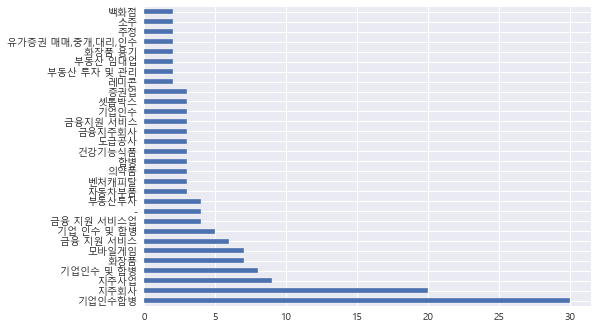

In [48]:
industry30.plot.barh()

Text(0.5, 1.0, '상장사 산업 빈도 수')

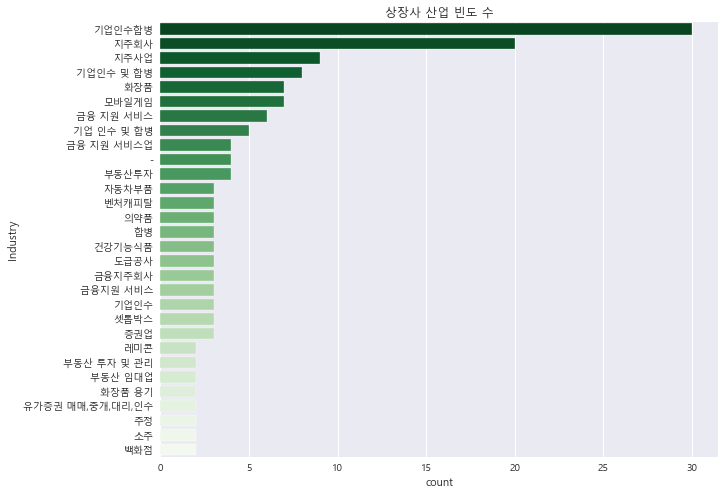

In [49]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_industry30, y='Industry', order=industry30.index, palette='Greens_r')
plt.title('상장사 산업 빈도 수')

#### 두 개의 변수 빈도수 구하고 시각화

In [50]:
pd.crosstab(df['Market'], df['Region']) # crosstab(index, columns)

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,5,31,1,4,4,1,6,0,2,46,...,0,3,0,3,1,1,5,9,0,0
KOSDAQ,17,532,48,42,10,31,39,6,39,548,...,9,62,2,12,16,2,70,62,4,8
KOSPI,4,147,43,19,9,21,7,0,35,426,...,16,24,0,7,12,5,25,16,1,0


<AxesSubplot:xlabel='count', ylabel='Region'>

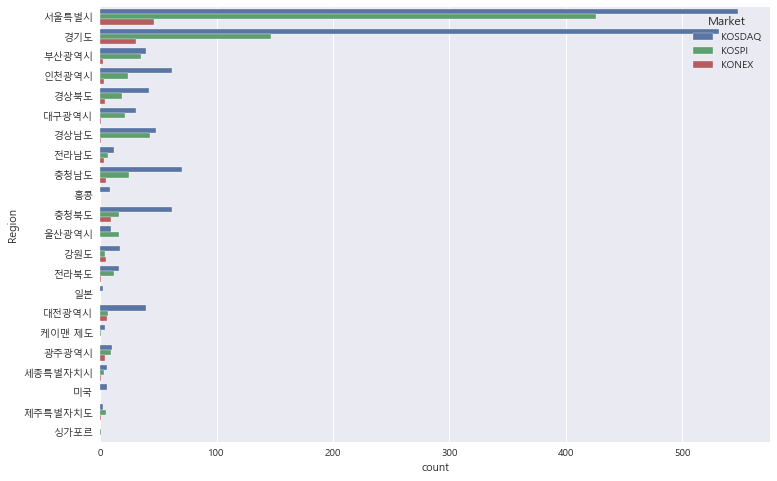

In [51]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Region', hue='Market')

In [52]:
market_year = pd.crosstab(df['Market'], df['ListingYear'])
market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


<AxesSubplot:xlabel='Market'>

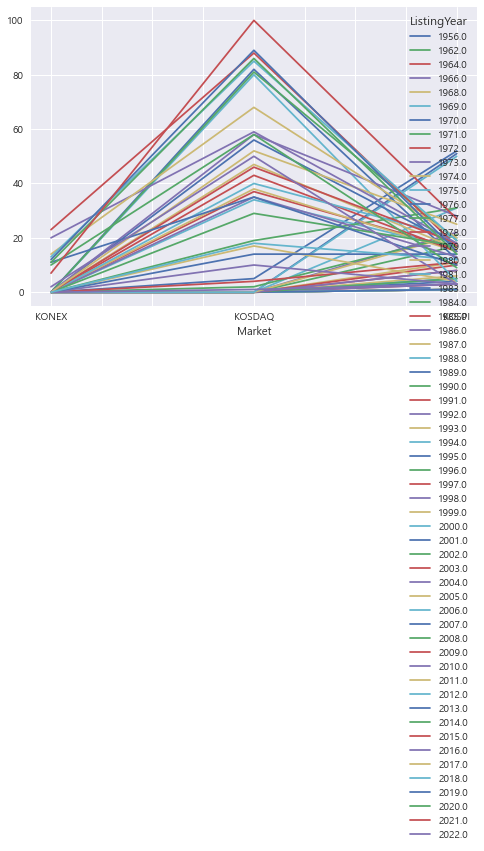

In [53]:
market_year.plot()

<AxesSubplot:title={'center':'연도별 상장 종목 수'}, xlabel='ListingYear'>

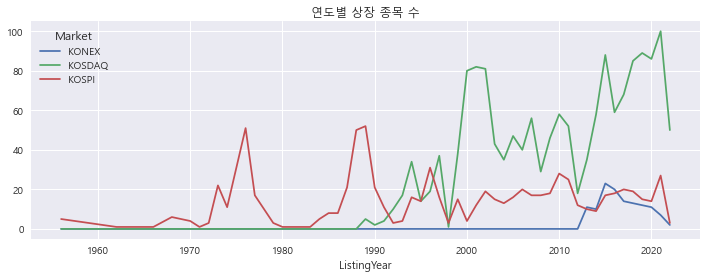

In [54]:
market_year.T.plot(figsize=(12,4), title='연도별 상장 종목 수')

array([<AxesSubplot:xlabel='ListingYear'>,
       <AxesSubplot:xlabel='ListingYear'>,
       <AxesSubplot:xlabel='ListingYear'>], dtype=object)

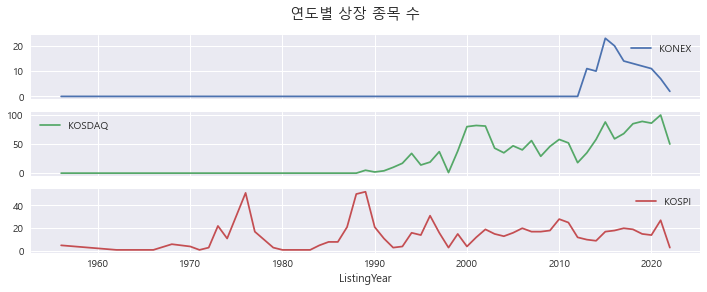

In [55]:
market_year.T.plot(figsize=(12,4), title='연도별 상장 종목 수', subplots=True)

<AxesSubplot:title={'center':'연도별 상장 종목 수'}, xlabel='ListingYear'>

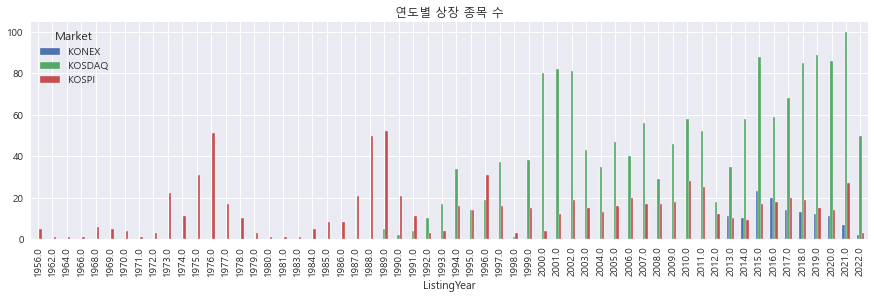

In [56]:
market_year.T.plot.bar(figsize=(15,4), title='연도별 상장 종목 수')

In [57]:
# market_year columns datatype 변경 (int)
market_year.columns = market_year.columns.astype(int)

<AxesSubplot:title={'center':'연도별 상장 종목 수'}, xlabel='ListingYear'>

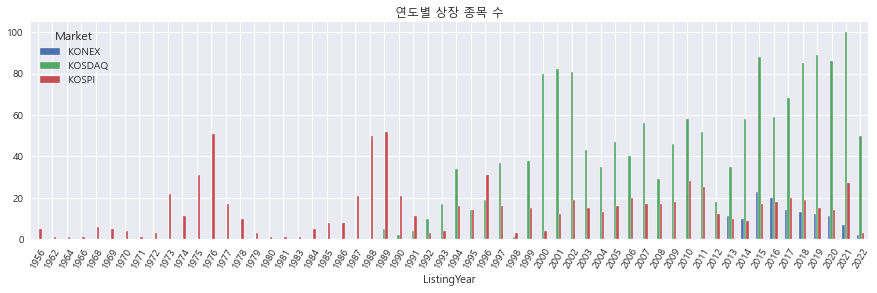

In [58]:
market_year.T.plot.bar(figsize=(15,4), title='연도별 상장 종목 수', rot=60)

In [59]:
market_year = df.groupby(['Market', 'ListingYear'])['Symbol'].count()
market_year

Market  ListingYear
KONEX   2013.0         11
        2014.0         10
        2015.0         23
        2016.0         20
        2017.0         14
                       ..
KOSPI   2018.0         19
        2019.0         15
        2020.0         14
        2021.0         27
        2022.0          3
Name: Symbol, Length: 102, dtype: int64

In [60]:
market_year = market_year.unstack().fillna(0).astype(int)
market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [61]:
market_year.columns = market_year.columns.astype(int)
market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


- crosstab : 두 개의 변수의 빈도수 구하기

- groupby : crosstab 이 한 결과와 동일한 모양을 만등어 낼 수 있음

- pivot_table : crosstab 이 한 결과와 동일한 모양을 만등어 낼 수 있음

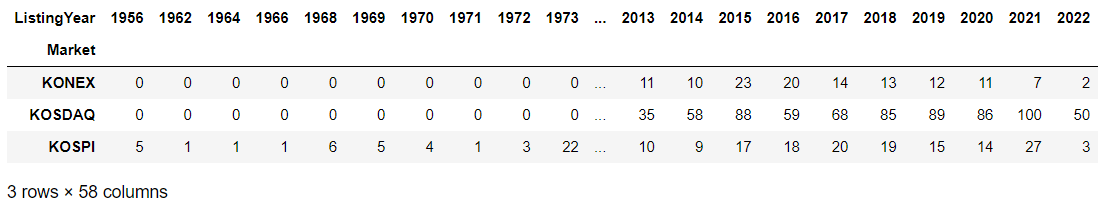

In [65]:
market_year_pivot = df.pivot_table(index='Market', columns='ListingYear', values='Symbol', aggfunc='count', fill_value=0)
market_year_pivot

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [67]:
market_year_pivot.columns = market_year_pivot.columns.astype(int)
market_year_pivot

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [68]:
market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,50
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [71]:
df_market_year = df.groupby(['Market', 'ListingYear'])['Symbol'].count().reset_index()
df_market_year

,Market,ListingYear,Symbol
0,KONEX,2013.0,11
1,KONEX,2014.0,10
2,KONEX,2015.0,23
3,KONEX,2016.0,20
4,KONEX,2017.0,14
...,...,...,...
97,KOSPI,2018.0,19
98,KOSPI,2019.0,15
99,KOSPI,2020.0,14
100,KOSPI,2021.0,27


In [77]:
# 컬럼명 변경
df_market_year.rename(columns={'Symbol':'Count'}, inplace=True)
df_market_year

,Market,ListingYear,Count
0,KONEX,2013.0,11
1,KONEX,2014.0,10
2,KONEX,2015.0,23
3,KONEX,2016.0,20
4,KONEX,2017.0,14
...,...,...,...
97,KOSPI,2018.0,19
98,KOSPI,2019.0,15
99,KOSPI,2020.0,14
100,KOSPI,2021.0,27


<AxesSubplot:xlabel='ListingYear', ylabel='Count'>

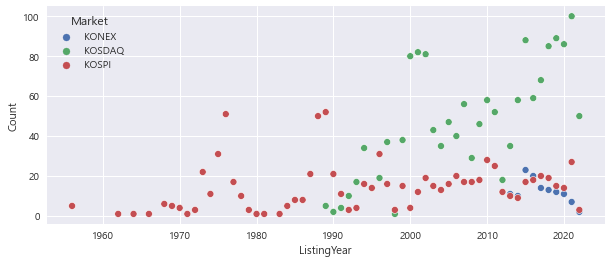

In [80]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_market_year, x='ListingYear', y='Count', hue='Market')

<AxesSubplot:xlabel='ListingYear', ylabel='Count'>

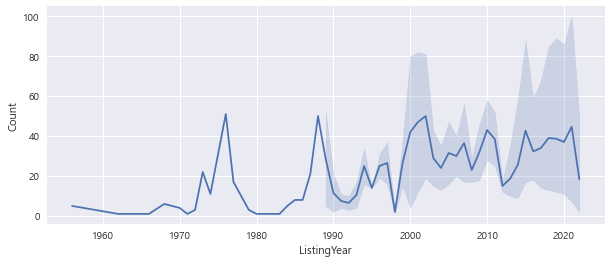

In [81]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_market_year, x='ListingYear', y='Count')

<AxesSubplot:xlabel='ListingYear', ylabel='Count'>

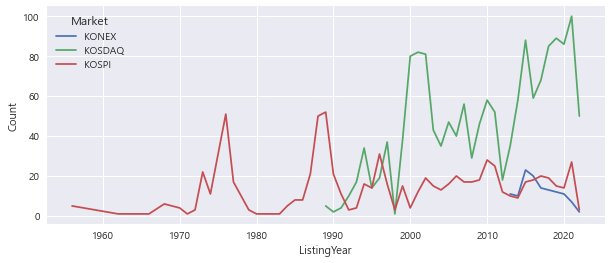

In [83]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_market_year, x='ListingYear', y='Count', hue='Market')

<Figure size 720x288 with 0 Axes>

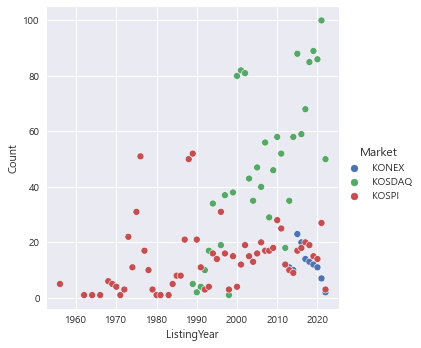

In [89]:
plt.figure(figsize=(10, 4))
sns.relplot(data=df_market_year, x='ListingYear', y='Count', hue='Market')
# relplot 특징
# kind 지정 가능 ( scatter, line ... )
# col / row : 지정 시 subplots 형식으로 나눠서 그래프를 그려줌

<Figure size 720x288 with 0 Axes>

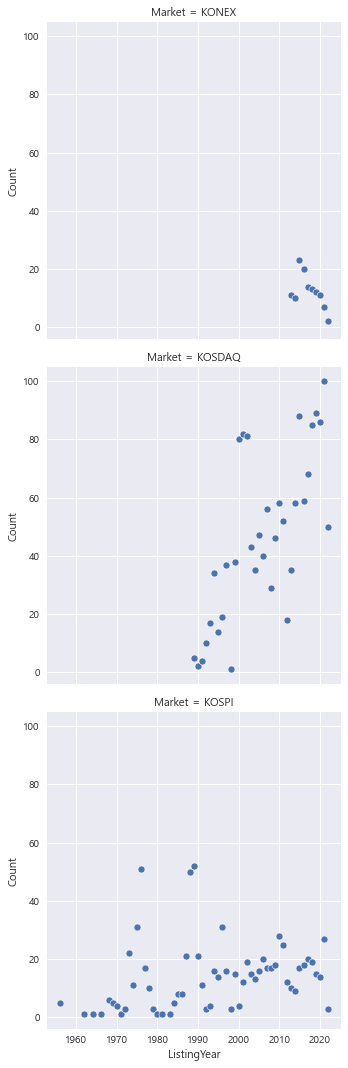

In [90]:
plt.figure(figsize=(10, 4))
sns.relplot(data=df_market_year, x='ListingYear', y='Count', row='Market')

<Figure size 720x288 with 0 Axes>

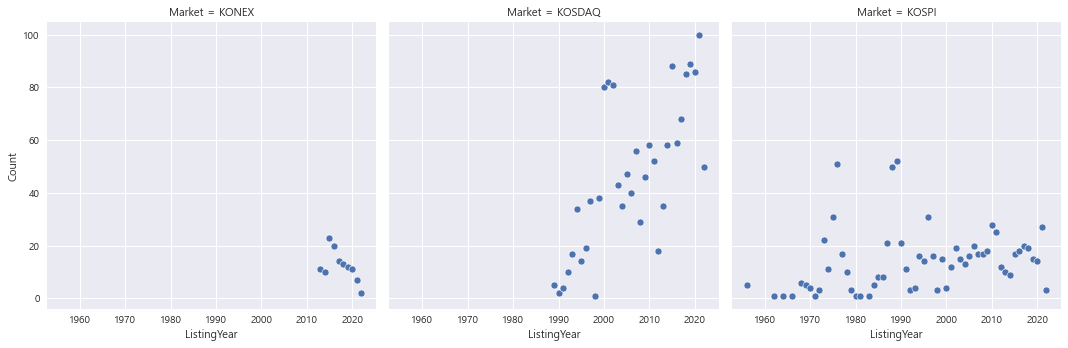

In [92]:
plt.figure(figsize=(10, 4))
sns.relplot(data=df_market_year, x='ListingYear', y='Count', col='Market')

<Figure size 720x288 with 0 Axes>

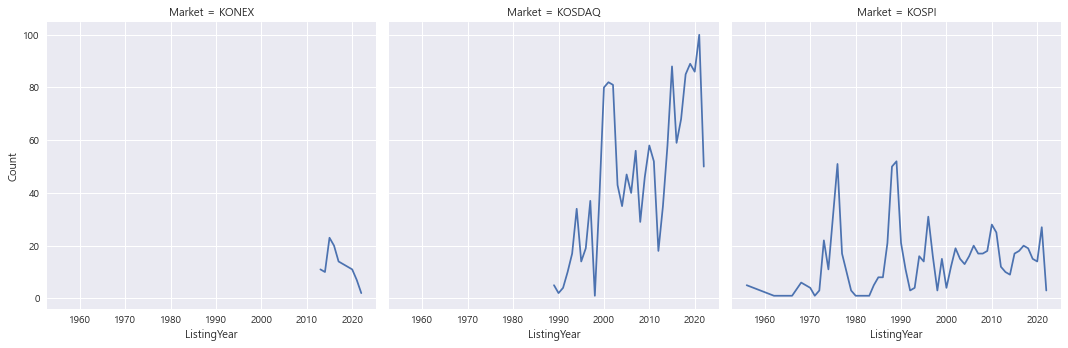

In [93]:
plt.figure(figsize=(10, 4))
sns.relplot(data=df_market_year, x='ListingYear', y='Count', col='Market', kind='line')